In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

In [2]:
df = pd.read_csv('./breast-cancer-wisconsin.data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      699 non-null    int64 
 1   clump_thickness         699 non-null    int64 
 2   unif_cell_size          699 non-null    int64 
 3   unif_cell_shape         699 non-null    int64 
 4   marg_adhesion           699 non-null    int64 
 5   single_epith_cell_size  699 non-null    int64 
 6   bare_nuclei             699 non-null    object
 7   bland_chrom             699 non-null    int64 
 8   norm_nuclieoli          699 non-null    int64 
 9   mitoses                 699 non-null    int64 
 10  class                   699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [4]:
df.sample(5)

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nuclieoli,mitoses,class
381,846423,10,6,3,6,4,10,7,8,4,4
402,1223003,5,3,3,1,2,1,2,1,1,2
516,1320077,1,1,1,1,1,1,1,1,1,2
198,1214092,1,1,1,1,2,1,1,1,1,2
644,1299596,2,1,1,1,2,1,1,1,1,2


In [5]:
df.replace('?', -99_999, inplace=True)

In [6]:
(df.iloc[40] == -99_999,df.iloc[40].bare_nuclei)

(id                        False
 clump_thickness           False
 unif_cell_size            False
 unif_cell_shape           False
 marg_adhesion             False
 single_epith_cell_size    False
 bare_nuclei                True
 bland_chrom               False
 norm_nuclieoli            False
 mitoses                   False
 class                     False
 Name: 40, dtype: bool,
 -99999)

In [7]:
# print(df.drop.__doc__)
"""
labels : single label or list-like
    Index or column labels to drop. A tuple will be used as a single
    label and not treated as a list-like.
axis : {0 or 'index', 1 or 'columns'}, default 0"""

df.drop(labels=['id'], axis=1, inplace=True)

In [8]:
# df.dropna(inplace=True)

In [9]:
X = np.array(df.drop(columns=['class']))
y = np.array(df['class'])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [11]:
clf = KNeighborsClassifier()

In [12]:
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [13]:
y_pred = clf.predict(X_test)

In [14]:
clf.score(X_test, y_test)

0.9857142857142858

In [15]:
example_measures = np.array([4,2,1,1,1,1,1,2,3])

clf.predict(example_measures.reshape(1, -1))

array([2], dtype=int64)

In [16]:
example_measures = np.array([[4,2,1,1,1,1,1,2,3], [1,2,1,1,1,1,4,2,3]])

clf.predict(example_measures.reshape(2, -1))

array([2, 2], dtype=int64)

In [17]:
example_measures = np.array([[4,2,1,1,1,1,1,2,3], [1,2,1,1,1,1,4,2,3]])

clf.predict(example_measures.reshape(len(example_measures), -1))

array([2, 2], dtype=int64)

In [18]:
example_measures = np.array([[4,2,1,1,1,1,1,2,3], [1,2,1,1,1,1,4,2,3]])

clf.predict(example_measures)

array([2, 2], dtype=int64)

In [19]:
from math import sqrt

plot1 = [1,3]
plot2 = [2,5]

euclidian_distance = sqrt(
    (plot2[1] - plot1[1])**2 + (plot2[0] - plot1[0])**2
)

print(euclidian_distance)

2.23606797749979


In [20]:
from matplotlib import style
from collections import Counter

In [21]:
style.use('fivethirtyeight')

import warnings

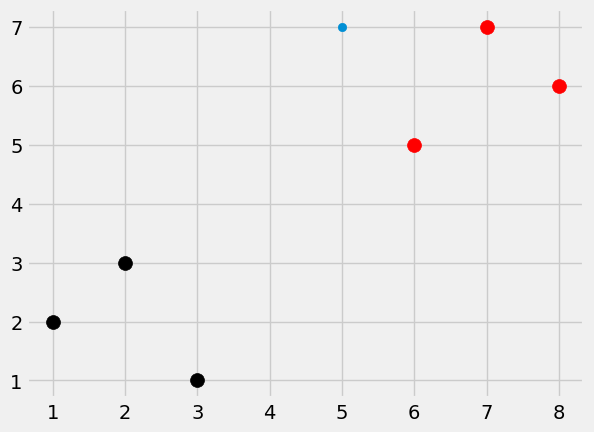

In [22]:
dataset = {
    'k': [[1,2],[2,3],[3,1]],
    'r': [[6,5],[7,7],[8,6]],
}

new_features = [5,7]

[[plt.scatter(ii[0], ii[1], s=100, color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0], new_features[1])

In [56]:
def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to value less than total voting groups!')
    distances = []
    for group in data:
        for features in data[group]:
            # euclidian_distance = sqrt(
            #     (predict[1] - features[1])**2 + (predict[0] - features[0])**2
            # )
            
            # euclidian_distance = np.sqrt(
            #     (np.sum(np.array(predict) - np.array(features))) ** 2
            # )
            
            euclidian_distance = np.linalg.norm(np.array(predict) - np.array(features))
            
            distances.append([euclidian_distance, group])
    
    votes = [i[1] for i  in sorted(distances)][:k]
    # print(votes)
    
    vote_result = Counter(votes).most_common(1)[0][0]
    confidence = Counter(votes).most_common(1)[0][1] / k
    # print(Counter(votes).most_common(1))
    # print(confidence)
    
    return vote_result, confidence

In [24]:
result = k_nearest_neighbors(dataset, new_features, k=3)

['r', 'r', 'r']
[('r', 3)]


In [25]:
result

'r'

In [26]:
df = pd.read_csv('./breast-cancer-wisconsin.data.csv')

In [27]:
df.replace('?', -99_999, inplace=True)

In [28]:
df.drop(columns=['id'], inplace=True)

In [29]:
full_data = df.astype(float).values.tolist()

In [30]:
full_data

[[5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [5.0, 4.0, 4.0, 5.0, 7.0, 10.0, 3.0, 2.0, 1.0, 2.0],
 [3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0, 2.0],
 [6.0, 8.0, 8.0, 1.0, 3.0, 4.0, 3.0, 7.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 3.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [8.0, 10.0, 10.0, 8.0, 7.0, 10.0, 9.0, 7.0, 1.0, 4.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 10.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 5.0, 2.0],
 [4.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [5.0, 3.0, 3.0, 3.0, 2.0, 3.0, 4.0, 4.0, 1.0, 4.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 3.0, 3.0, 1.0, 1.0, 2.0],
 [8.0, 7.0, 5.0, 10.0, 7.0, 9.0, 5.0, 5.0, 4.0, 4.0],
 [7.0, 4.0, 6.0, 4.0, 6.0, 1.0, 4.0, 3.0, 1.0, 4.0],
 [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [10.0, 7.0, 7.0, 6.0, 4.0, 10.0, 4.0, 1

In [31]:
df.astype(float)

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nuclieoli,mitoses,class
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...
694,3.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,2.0
695,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0
696,5.0,10.0,10.0,3.0,7.0,3.0,8.0,10.0,2.0,4.0
697,4.0,8.0,6.0,4.0,3.0,4.0,10.0,6.0,1.0,4.0


In [32]:
df.astype(float).values

array([[ 5.,  1.,  1., ...,  1.,  1.,  2.],
       [ 5.,  4.,  4., ...,  2.,  1.,  2.],
       [ 3.,  1.,  1., ...,  1.,  1.,  2.],
       ...,
       [ 5., 10., 10., ..., 10.,  2.,  4.],
       [ 4.,  8.,  6., ...,  6.,  1.,  4.],
       [ 4.,  8.,  8., ...,  4.,  1.,  4.]])

In [33]:
df.astype(float).values.tolist()

[[5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [5.0, 4.0, 4.0, 5.0, 7.0, 10.0, 3.0, 2.0, 1.0, 2.0],
 [3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0, 2.0],
 [6.0, 8.0, 8.0, 1.0, 3.0, 4.0, 3.0, 7.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 3.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [8.0, 10.0, 10.0, 8.0, 7.0, 10.0, 9.0, 7.0, 1.0, 4.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 10.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 5.0, 2.0],
 [4.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [5.0, 3.0, 3.0, 3.0, 2.0, 3.0, 4.0, 4.0, 1.0, 4.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 3.0, 3.0, 1.0, 1.0, 2.0],
 [8.0, 7.0, 5.0, 10.0, 7.0, 9.0, 5.0, 5.0, 4.0, 4.0],
 [7.0, 4.0, 6.0, 4.0, 6.0, 1.0, 4.0, 3.0, 1.0, 4.0],
 [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [10.0, 7.0, 7.0, 6.0, 4.0, 10.0, 4.0, 1

In [34]:
df.values

array([[5, 1, 1, ..., 1, 1, 2],
       [5, 4, 4, ..., 2, 1, 2],
       [3, 1, 1, ..., 1, 1, 2],
       ...,
       [5, 10, 10, ..., 10, 2, 4],
       [4, 8, 6, ..., 6, 1, 4],
       [4, 8, 8, ..., 4, 1, 4]], dtype=object)

In [35]:
import random

In [36]:
random.shuffle(full_data) # inplace

In [37]:
test_size= 0.2

In [38]:
train_set = {2:[], 4:[]}
test_set = {2:[], 4:[]}

In [39]:
train_data = full_data[:-int(test_size * len(full_data))]

In [40]:
test_data = full_data[-int(test_size * len(full_data)):]

In [41]:
for i in train_data:
    train_set[i[-1]].append(i[:-1])

for i in test_data:
    test_set[i[-1]].append(i[:-1])

In [58]:
total = 0
correct = 0

for group in test_set:
    for data in test_set[group]:
        vote, confidence = k_nearest_neighbors(train_set, data, k=5)
        if vote == group:
            correct += 1
        else:
            print(confidence)
        total += 1

print('Accuracy:', correct / total)

0.8
0.8
Accuracy: 0.9856115107913669
